# Study about Neural Networks - Percepton insperation

# 1. Introduction and problem design

This jupyter notebook intends to be as simpler as possible for people understand what neural networks really is.
The idea is to separate two datasets with a line (hyperplane) using only one neuron.

# 2. Import of libraries

In [1]:
import numpy as np
from sklearn import datasets as d
from sklearn import model_selection as ms

import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3. Generation of dataset using numpy and sklearn

In [2]:
space = 0.2
X = np.append(
    np.array([3,3]) + d.make_circles(n_samples=1000, noise=0.4, factor=.9)[0],
    np.array([0,0]) + d.make_circles(n_samples=1000, noise=0.4, factor=.9)[0],
    #np.array([1,1]) +np.mgrid[-space:space:step, -space:space:step].reshape(2,-1).T, 
    #np.array([0,0]) +np.mgrid[-space:space:step, -space:space:step].reshape(2,-1).T,
    axis=0)
y = -X[:,0] +3 -X[:,1]
y = np.array([*map(lambda x: 1 if x >= 0 else 0, y)])

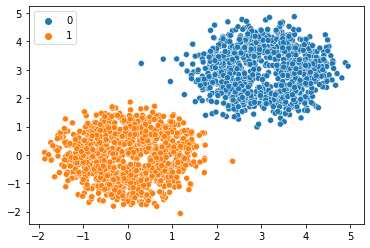

In [3]:
sns.scatterplot(X[:,0], X[:,1], hue=y);

# 3. Neural network modelling

In [4]:
# Splitting the dataset in trainning and validation
x_train, x_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.1, random_state=1)

In [5]:
# Creating the simple linear neuron
model = Sequential()
model.add(Dense(1, activation='linear', input_dim=2))

# Hinge loss function was best model for this problem, uncomment the others to test
model.compile(loss='Hinge')
# model.compile(loss='mean_squared_error')
# model.compile(loss='BinaryCrossentropy')
# model.compile(loss='MeanSquaredLogarithmicError')
# model.compile(loss='MeanAbsolutePercentageError')

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5235 - val_loss: 0.5487
Epoch 2/100
57/57 [==============================] - 0s 542us/step - loss: 0.4956 - val_loss: 0.5198
Epoch 3/100
57/57 [==============================] - 0s 553us/step - loss: 0.4678 - val_loss: 0.4908
Epoch 4/100
57/57 [==============================] - 0s 556us/step - loss: 0.4409 - val_loss: 0.4620
Epoch 5/100
57/57 [==============================] - 0s 549us/step - loss: 0.4135 - val_loss: 0.4326
Epoch 6/100
57/57 [==============================] - 0s 536us/step - loss: 0.3860 - val_loss: 0.4038
Epoch 7/100
57/57 [==============================] - 0s 541us/step - loss: 0.3591 - val_loss: 0.3754
Epoch 8/100
57/57 [==============================] - 0s 548us/step - loss: 0.3320 - val_loss: 0.3456
Epoch 9/100
57/57 [==============================] - 0s 535us/step - loss: 0.3050 - val_loss: 0.3166
Epoch 10/100
57/57 [==============================] - 0s 550us/step - loss: 0.2771 - val_loss

57/57 [==============================] - 0s 533us/step - loss: 0.0111 - val_loss: 0.0068
Epoch 82/100
57/57 [==============================] - 0s 536us/step - loss: 0.0109 - val_loss: 0.0066
Epoch 83/100
57/57 [==============================] - 0s 535us/step - loss: 0.0108 - val_loss: 0.0065
Epoch 84/100
57/57 [==============================] - 0s 531us/step - loss: 0.0106 - val_loss: 0.0064
Epoch 85/100
57/57 [==============================] - 0s 528us/step - loss: 0.0105 - val_loss: 0.0063
Epoch 86/100
57/57 [==============================] - 0s 528us/step - loss: 0.0103 - val_loss: 0.0062
Epoch 87/100
57/57 [==============================] - 0s 520us/step - loss: 0.0102 - val_loss: 0.0061
Epoch 88/100
57/57 [==============================] - 0s 545us/step - loss: 0.0100 - val_loss: 0.0060
Epoch 89/100
57/57 [==============================] - 0s 556us/step - loss: 0.0099 - val_loss: 0.0059
Epoch 90/100
57/57 [==============================] - 0s 542us/step - loss: 0.0098 - val_loss: 

# 4. Exploring the weights of the neuron

In [6]:
#Test points
pto_test_x = 0.8
pto_test_y = 0.3

In [7]:
# Prediction of a point with the help of model
model.predict(np.array([[pto_test_x,pto_test_y]]))

array([[1.711682]], dtype=float32)

In [8]:
# Calculating the prediction with the weight of the linear neuron
# Linear Neuron: x1*w1 + x2*w2 + b = 0
pto_test_x * model.layers[0].get_weights()[0][0] +\
pto_test_y * model.layers[0].get_weights()[0][1] +\
model.layers[0].get_weights()[1]

array([1.711682], dtype=float32)

# 5. Plotting the line of the linear neuron

Text(0.5, 1.0, 'Separation line from the unique neuron')

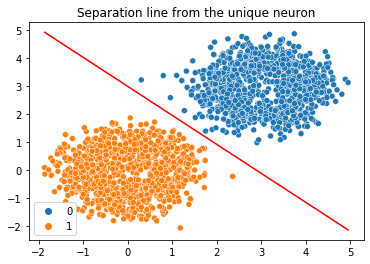

In [9]:
#extract weights and bias from model
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

w1 = weights[0][0]
w2 = weights[1][0]
b = biases[0]

x_line = np.linspace(x_train[:,0].min(), x_train[:,0].max(), 100)

# Linear Neuron: x1*w1 + x2*w2 + b = 0
y_line = -(b + w1*x_line) / w2

sns.scatterplot(X[:,0], X[:,1], hue=y);
plt.plot(x_line, y_line, color='red');
plt.title('Separation line from the unique neuron')

# 6. Conclusion

This notebook implemented a simple linear neuron in order to students understand how neural network really works.
Starting with simple linear network, it is possible to expand this jupyter notebook to more complex analysis.
Besides, users can modify the data and run it on simple cpus.